# 100 pandas puzzles

Inspired by [100 Numpy exerises](https://github.com/rougier/numpy-100), here are 100* short puzzles for testing your knowledge of [pandas'](http://pandas.pydata.org/) power.

Since pandas is a large library with many different specialist features and functions, these excercises focus mainly on the fundamentals of manipulating data (indexing, grouping, aggregating, cleaning), making use of the core DataFrame and Series objects.

Many of the excerises here are stright-forward in that the solutions require no more than a few lines of code (in pandas or NumPy... don't go using pure Python or Cython!). Choosing the right methods and following best practices is the underlying goal.

The exercises are loosely divided in sections. Each section has a difficulty rating; these ratings are subjective, of course, but should be a seen as a rough guide as to how inventive the required solution is.

If you're just starting out with pandas and you are looking for some other resources, the official documentation  is very extensive. In particular, some good places get a broader overview of pandas are...

- [10 minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)
- [pandas basics](http://pandas.pydata.org/pandas-docs/stable/basics.html)
- [tutorials](http://pandas.pydata.org/pandas-docs/stable/tutorials.html)
- [cookbook and idioms](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook)

Enjoy the puzzles!

\* *the list of exercises is not yet complete! Pull requests or suggestions for additional exercises, corrections and improvements are welcomed.*

## Importing pandas

### Getting started and checking your pandas setup

Difficulty: *easy*

**1.** Import pandas under the alias `pd`.

In [1]:
import pandas as pd

**2.** Print the version of pandas that has been imported.

In [3]:
pd.__version__

'1.5.3'

**3.** Print out all the *version* information of the libraries that are required by the pandas library.

In [4]:
import pandas as pd

# Print the version information of pandas and its dependencies
pd.show_versions()


/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")



INSTALLED VERSIONS
------------------
commit           : 2e218d10984e9919f0296931d92ea851c6a6faf5
python           : 3.10.6.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.15.109+
Version          : #1 SMP Fri Jun 9 10:57:30 UTC 2023
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.5.3
numpy            : 1.22.4
pytz             : 2022.7.1
dateutil         : 2.8.2
setuptools       : 67.7.2
pip              : 23.1.2
Cython           : 0.29.36
pytest           : 7.2.2
hypothesis       : None
sphinx           : 3.5.4
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.9.3
html5lib         : 1.1
pymysql          : None
psycopg2         : 2.9.6
jinja2           : 3.1.2
IPython          : 7.34.0
pandas_datareader: 0.10.0
bs4              : 4.11.2
bottleneck       : None
brotli           : 

## DataFrame basics

### A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames

Difficulty: *easy*

Note: remember to import numpy using:
```python
import numpy as np
```

Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```
(This is just some meaningless data I made up with the theme of animals and trips to a vet.)

**4.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [6]:
import numpy as np

data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data, index=labels)

print(df)

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  2.0       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no


**5.** Display a summary of the basic information about this DataFrame and its data (*hint: there is a single method that can be called on the DataFrame*).

In [7]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    10 non-null     object 
 1   age       8 non-null      float64
 2   visits    10 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes
None


**6.** Return the first 3 rows of the DataFrame `df`.

In [8]:
df.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


**7.** Select just the 'animal' and 'age' columns from the DataFrame `df`.

In [10]:
a=df[['animal','age']]
a

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


**8.** Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.

In [11]:
a = df.loc[['d', 'e', 'i'], ['animal', 'age']]
a

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


**9.** Select only the rows where the number of visits is greater than 3.

In [14]:
a = df[df ['visits']>3]
a

,animal,age,visits,priority


**10.** Select the rows where the age is missing, i.e. it is `NaN`.

In [16]:
a = df[pd.isna(df['age'])]
a


,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


**11.** Select the rows where the animal is a cat *and* the age is less than 3.

In [21]:
 a= df[(df['animal']=='cat') & (df['age']<3)]
 a



,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


**12.** Select the rows the age is between 2 and 4 (inclusive).

In [23]:
a = df[(df['age'] >= 2) & (df['age'] <= 4)]
a

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


**13.** Change the age in row 'f' to 1.5.

In [24]:
df.loc['f', 'age'] = 1.5
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**14.** Calculate the sum of all visits in `df` (i.e. find the total number of visits).

In [25]:
total_visits = df['visits'].sum()
total_visits

19

**15.** Calculate the mean age for each different animal in `df`.

In [27]:
mean_age_by_animal = df.groupby('animal')['age'].mean()
mean_age_by_animal

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64

**16.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [28]:
# Append a new row 'k' to df with your choice of values
new_row_data = {'animal': 'frog', 'age': 1.5, 'visits': 2, 'priority': 'no'}
df = df.append(pd.Series(new_row_data, name='k'))

print("DataFrame with new row:")
print(df)

# Delete the row 'k' to return the original DataFrame
df = df.drop('k')

print("\nOriginal DataFrame after deleting the new row:")
print(df)

DataFrame with new row:
  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  1.5       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no
k   frog  1.5       2       no

Original DataFrame after deleting the new row:
  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  1.5       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no


<ipython-input-28-f0f6bb92087b>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(new_row_data, name='k'))


**17.** Count the number of each type of animal in `df`.

In [30]:
animal_counts = df['animal'].value_counts()
animal_counts

cat      4
dog      4
snake    2
Name: animal, dtype: int64

**18.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visits' column in *ascending* order (so row `i` should be first, and row `d` should be last).

In [31]:
df_sorted = df.sort_values(by=['age', 'visits'], ascending=[False, True])

print(df_sorted)

  animal  age  visits priority
i    dog  7.0       2       no
e    dog  5.0       2       no
g  snake  4.5       1       no
j    dog  3.0       1       no
b    cat  3.0       3      yes
a    cat  2.5       1      yes
f    cat  1.5       3       no
c  snake  0.5       2       no
h    cat  NaN       1      yes
d    dog  NaN       3      yes


**19.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [32]:
df['priority'] = df['priority'].map({'yes': True, 'no': False})

print(df)

  animal  age  visits  priority
a    cat  2.5       1      True
b    cat  3.0       3      True
c  snake  0.5       2     False
d    dog  NaN       3      True
e    dog  5.0       2     False
f    cat  1.5       3     False
g  snake  4.5       1     False
h    cat  NaN       1      True
i    dog  7.0       2     False
j    dog  3.0       1     False


**20.** In the 'animal' column, change the 'snake' entries to 'python'.

In [34]:
df['animal'] = df['animal'].replace('snake', 'python')

print(df)

   animal  age  visits  priority
a     cat  2.5       1      True
b     cat  3.0       3      True
c  python  0.5       2     False
d     dog  NaN       3      True
e     dog  5.0       2     False
f     cat  1.5       3     False
g  python  4.5       1     False
h     cat  NaN       1      True
i     dog  7.0       2     False
j     dog  3.0       1     False


**21.** For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (*hint: use a pivot table*).

In [35]:
pivot_table = pd.pivot_table(df, values='age', index='animal', columns='visits', aggfunc=np.mean)

print(pivot_table)

visits    1    2     3
animal                
cat     2.5  NaN  2.25
dog     3.0  6.0   NaN
python  4.5  0.5   NaN


## DataFrames: beyond the basics

### Slightly trickier: you may need to combine two or more methods to get the right answer

Difficulty: *medium*

The previous section was tour through some basic but essential DataFrame operations. Below are some ways that you might need to cut your data, but for which there is no single "out of the box" method.

**22.** You have a DataFrame `df` with a column 'A' of integers. For example:
```python
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
```

How do you filter out rows which contain the same integer as the row immediately above?

You should be left with a column containing the following values:

```python
1, 2, 3, 4, 5, 6, 7
```

In [36]:
import pandas as pd

data = {'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]}
df = pd.DataFrame(data)

# Filter out rows which contain the same integer as the row immediately above
filtered_df = df[df['A'] != df['A'].shift()]

print(filtered_df)

   A
0  1
1  2
3  3
4  4
5  5
8  6
9  7


**23.** Given a DataFrame of numeric values, say
```python
df = pd.DataFrame(np.random.random(size=(5, 3))) # a 5x3 frame of float values
```

how do you subtract the row mean from each element in the row?

In [37]:
# Create the DataFrame with random float values
df = pd.DataFrame(np.random.random(size=(5, 3)))

# Subtract the row mean from each element in the row
df_subtracted = df.sub(df.mean(axis=1), axis=0)

print(df)
print("After subtracting row mean:")
print(df_subtracted)

          0         1         2
0  0.942929  0.760999  0.897336
1  0.397594  0.459718  0.967828
2  0.212744  0.384446  0.860465
3  0.264542  0.067760  0.002640
4  0.626845  0.015768  0.805118
After subtracting row mean:
          0         1         2
0  0.075841 -0.106089  0.030248
1 -0.210786 -0.148662  0.359448
2 -0.273141 -0.101439  0.374580
3  0.152895 -0.043888 -0.109007
4  0.144268 -0.466809  0.322541


**24.** Suppose you have DataFrame with 10 columns of real numbers, for example:

```python
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
```
Which column of numbers has the smallest sum?  Return that column's label.

In [38]:



# Create the DataFrame with random float values
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))

# Find the column with the smallest sum
smallest_sum_column = df.sum().idxmin()

print("Column with the smallest sum:", smallest_sum_column)


Column with the smallest sum: e


**25.** How do you count how many unique rows a DataFrame has (i.e. ignore all rows that are duplicates)? As input, use a DataFrame of zeros and ones with 10 rows and 3 columns.

```python
df = pd.DataFrame(np.random.randint(0, 2, size=(10, 3)))
```

In [ ]:

# Create the DataFrame with random zeros and ones
df = pd.DataFrame(np.random.randint(0, 2, size=(10, 3)))

# Count the number of unique rows
unique_rows_count = df.drop_duplicates().shape[0]

print("Number of unique rows:", unique_rows_count)


The next three puzzles are slightly harder.


**26.** In the cell below, you have a DataFrame `df` that consists of 10 columns of floating-point numbers. Exactly 5 entries in each row are NaN values.

For each row of the DataFrame, find the *column* which contains the *third* NaN value.

You should return a Series of column labels: `e, c, d, h, d`

In [39]:
nan = np.nan

data = [[0.04,  nan,  nan, 0.25,  nan, 0.43, 0.71, 0.51,  nan,  nan],
        [ nan,  nan,  nan, 0.04, 0.76,  nan,  nan, 0.67, 0.76, 0.16],
        [ nan,  nan, 0.5 ,  nan, 0.31, 0.4 ,  nan,  nan, 0.24, 0.01],
        [0.49,  nan,  nan, 0.62, 0.73, 0.26, 0.85,  nan,  nan,  nan],
        [ nan,  nan, 0.41,  nan, 0.05,  nan, 0.61,  nan, 0.48, 0.68]]

columns = list('abcdefghij')

df = pd.DataFrame(data, columns=columns)

# write a solution to the question here
third_nan_column = df.apply(lambda row: row.index[np.argsort(row.isna())][2], axis=1)

print(third_nan_column)







0    f
1    h
2    f
3    e
4    g
dtype: object


**27.** A DataFrame has a column of groups 'grps' and and column of integer values 'vals':

```python
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'),
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
```
For each *group*, find the sum of the three greatest values. You should end up with the answer as follows:
```
grps
a    409
b    156
c    345
```

In [40]:
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'),
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})

# write a solution to the question here
sum_of_three_greatest = df.groupby('grps')['vals'].nlargest(3).sum(level=0)

print(sum_of_three_greatest)

grps
a    409
b    156
c    345
Name: vals, dtype: int64


<ipython-input-40-7f1fd38553c6>:5: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  sum_of_three_greatest = df.groupby('grps')['vals'].nlargest(3).sum(level=0)


**28.** The DataFrame `df` constructed below has two integer columns 'A' and 'B'. The values in 'A' are between 1 and 100 (inclusive).

For each group of 10 consecutive integers in 'A' (i.e. `(0, 10]`, `(10, 20]`, ...), calculate the sum of the corresponding values in column 'B'.

The answer should be a Series as follows:

```
A
(0, 10]      635
(10, 20]     360
(20, 30]     315
(30, 40]     306
(40, 50]     750
(50, 60]     284
(60, 70]     424
(70, 80]     526
(80, 90]     835
(90, 100]    852
```

In [41]:
df = pd.DataFrame(np.random.RandomState(8765).randint(1, 101, size=(100, 2)), columns = ["A", "B"])

# write a solution to the question here
bins = np.arange(0, 110, 10)  # Define the bin edges as multiples of 10 from 0 to 100
df['bins'] = pd.cut(df['A'], bins=bins)  # Create a new column 'bins' with the bin labels
result = df.groupby('bins')['B'].sum()

# Drop the temporary 'bins' column from the DataFrame
df.drop(columns='bins', inplace=True)

print(result)

bins
(0, 10]      635
(10, 20]     360
(20, 30]     315
(30, 40]     306
(40, 50]     750
(50, 60]     284
(60, 70]     424
(70, 80]     526
(80, 90]     835
(90, 100]    852
Name: B, dtype: int64


## DataFrames: harder problems

### These might require a bit of thinking outside the box...

...but all are solvable using just the usual pandas/NumPy methods (and so avoid using explicit `for` loops).

Difficulty: *hard*

**29.** Consider a DataFrame `df` where there is an integer column 'X':
```python
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})
```
For each value, count the difference back to the previous zero (or the start of the Series, whichever is closer). These values should therefore be

```
[1, 2, 0, 1, 2, 3, 4, 0, 1, 2]
```

Make this a new column 'Y'.

In [45]:
import pandas as pd

# Given DataFrame
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})

# Create a new column 'Y' that counts the difference back to the previous zero
df['Y'] = df.groupby((df['X'] == 0).cumsum()).cumcount()

print(df)


   X  Y
0  7  0
1  2  1
2  0  0
3  3  1
4  4  2
5  2  3
6  5  4
7  0  0
8  3  1
9  4  2


**30.** Consider the DataFrame constructed below which contains rows and columns of numerical data.

Create a list of the column-row index locations of the 3 largest values in this DataFrame. In this case, the answer should be:
```
[(5, 7), (6, 4), (2, 5)]
```

In [46]:
df = pd.DataFrame(np.random.RandomState(30).randint(1, 101, size=(8, 8)))

# Get the column-row index locations of the 3 largest values
largest_values = df.stack().nlargest(3)

# Convert the index locations to a list of tuples
locations = list(zip(largest_values.index.get_level_values(0), largest_values.index.get_level_values(1)))

print(locations)

[(5, 2), (4, 6), (7, 5)]


**31.** You are given the DataFrame below with a column of group IDs, 'grps', and a column of corresponding integer values, 'vals'.

```python
df = pd.DataFrame({"vals": np.random.RandomState(31).randint(-30, 30, size=15),
                   "grps": np.random.RandomState(31).choice(["A", "B"], 15)})
```

Create a new column 'patched_values' which contains the same values as the 'vals' any negative values in 'vals' with the group mean:

```
    vals grps  patched_vals
0    -12    A          13.6
1     -7    B          28.0
2    -14    A          13.6
3      4    A           4.0
4     -7    A          13.6
5     28    B          28.0
6     -2    A          13.6
7     -1    A          13.6
8      8    A           8.0
9     -2    B          28.0
10    28    A          28.0
11    12    A          12.0
12    16    A          16.0
13   -24    A          13.6
14   -12    A          13.6
```

In [47]:
data = {"vals": np.random.RandomState(31).randint(-30, 30, size=15),
        "grps": np.random.RandomState(31).choice(["A", "B"], 15)}
df = pd.DataFrame(data)

# Calculate the group mean for each group
group_means = df.groupby('grps')['vals'].mean()

# Create the new column 'patched_values' with the group mean applied to negative values in 'vals'
df['patched_values'] = df.apply(lambda row: group_means[row['grps']] if row['vals'] < 0 else row['vals'], axis=1)

print(df)


    vals grps  patched_values
0    -12    A       -0.333333
1     -7    B        6.333333
2    -14    A       -0.333333
3      4    A        4.000000
4     -7    A       -0.333333
5     28    B       28.000000
6     -2    A       -0.333333
7     -1    A       -0.333333
8      8    A        8.000000
9     -2    B        6.333333
10    28    A       28.000000
11    12    A       12.000000
12    16    A       16.000000
13   -24    A       -0.333333
14   -12    A       -0.333333


**32.** Implement a rolling mean over groups with window size 3, which ignores NaN value. For example consider the following DataFrame:

```python
>>> df = pd.DataFrame({'group': list('aabbabbbabab'),
                       'value': [1, 2, 3, np.nan, 2, 3, np.nan, 1, 7, 3, np.nan, 8]})
>>> df
   group  value
0      a    1.0
1      a    2.0
2      b    3.0
3      b    NaN
4      a    2.0
5      b    3.0
6      b    NaN
7      b    1.0
8      a    7.0
9      b    3.0
10     a    NaN
11     b    8.0
```
The goal is to compute the Series:

```
0     1.000000
1     1.500000
2     3.000000
3     3.000000
4     1.666667
5     3.000000
6     3.000000
7     2.000000
8     3.666667
9     2.000000
10    4.500000
11    4.000000
```
E.g. the first window of size three for group 'b' has values 3.0, NaN and 3.0 and occurs at row index 5. Instead of being NaN the value in the new column at this row index should be 3.0 (just the two non-NaN values are used to compute the mean (3+3)/2)

## Series and DatetimeIndex

### Exercises for creating and manipulating Series with datetime data

Difficulty: *easy/medium*

pandas is fantastic for working with dates and times. These puzzles explore some of this functionality.


**33.** Create a DatetimeIndex that contains each business day of 2015 and use it to index a Series of random numbers. Let's call this Series `s`.

In [48]:
business_days_2015 = pd.date_range(start='2015-01-01', end='2015-12-31', freq='B')

# Use the DatetimeIndex to index a Series of random numbers
s = pd.Series(np.random.random(size=len(business_days_2015)), index=business_days_2015)

print(s)

2015-01-01    0.721259
2015-01-02    0.122753
2015-01-05    0.531987
2015-01-06    0.922679
2015-01-07    0.214418
                ...   
2015-12-25    0.515949
2015-12-28    0.532001
2015-12-29    0.410484
2015-12-30    0.459300
2015-12-31    0.664197
Freq: B, Length: 261, dtype: float64


**34.** Find the sum of the values in `s` for every Wednesday.

In [49]:
business_days_2015 = pd.date_range(start='2015-01-01', end='2015-12-31', freq='B')

# Use the DatetimeIndex to index a Series of random numbers
s = pd.Series(np.random.random(size=len(business_days_2015)), index=business_days_2015)

# Find the sum of the values for every Wednesday
sum_wednesday = s[s.index.weekday == 2].sum()

print("Sum of values for every Wednesday:", sum_wednesday)

Sum of values for every Wednesday: 25.07517584893849


**35.** For each calendar month in `s`, find the mean of values.

In [50]:
business_days_2015 = pd.date_range(start='2015-01-01', end='2015-12-31', freq='B')

# Use the DatetimeIndex to index a Series of random numbers
s = pd.Series(np.random.random(size=len(business_days_2015)), index=business_days_2015)

# Find the mean of values for each calendar month
mean_per_month = s.resample('M').mean()

print(mean_per_month)



2015-01-31    0.523041
2015-02-28    0.520399
2015-03-31    0.514347
2015-04-30    0.557749
2015-05-31    0.555092
2015-06-30    0.565132
2015-07-31    0.549736
2015-08-31    0.583077
2015-09-30    0.410236
2015-10-31    0.508828
2015-11-30    0.473682
2015-12-31    0.444818
Freq: M, dtype: float64


**36.** For each group of four consecutive calendar months in `s`, find the date on which the highest value occurred.

In [52]:
business_days_2015 = pd.date_range(start='2015-01-01', end='2015-12-31', freq='B')

# Use the DatetimeIndex to index a Series of random numbers
s = pd.Series(np.random.random(size=len(business_days_2015)), index=business_days_2015)

# Find the date on which the highest value occurred for each group of four consecutive calendar months
groups = s.resample('4M')  # Group data in four-month intervals
highest_dates_per_group = groups.apply(lambda x: x.idxmax())  # Find index (date) of max value for each group

print(highest_dates_per_group)

2015-01-31   2015-01-09
2015-05-31   2015-02-10
2015-09-30   2015-09-15
2016-01-31   2015-11-27
Freq: 4M, dtype: datetime64[ns]


**37.** Create a DateTimeIndex consisting of the third Thursday in each month for the years 2015 and 2016.

## Cleaning Data

### Making a DataFrame easier to work with

Difficulty: *easy/medium*

It happens all the time: someone gives you data containing malformed strings, Python, lists and missing data. How do you tidy it up so you can get on with the analysis?

Take this monstrosity as the DataFrame to use in the following puzzles:

```python
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',
                               '12. Air France', '"Swiss Air"']})
```
Formatted, it looks like this:

```
            From_To  FlightNumber  RecentDelays              Airline
0      LoNDon_paris       10045.0      [23, 47]               KLM(!)
1      MAdrid_miLAN           NaN            []    <Air France> (12)
2  londON_StockhOlm       10065.0  [24, 43, 87]  (British Airways. )
3    Budapest_PaRis           NaN          [13]       12. Air France
4   Brussels_londOn       10085.0      [67, 32]          "Swiss Air"
```


(It's some flight data I made up; it's not meant to be accurate in any way.)


**38.** Some values in the the **FlightNumber** column are missing (they are `NaN`). These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Modify `df` to fill in these missing numbers and make the column an integer column (instead of a float column).

In [55]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
                               'Budapest_PaRis', 'Brussels_londOn'],
                   'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
                   'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',
                               '12. Air France', '"Swiss Air"']})

# Fill in missing values in the 'FlightNumber' column with linear interpolation
df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)

print(df)


            From_To  FlightNumber  RecentDelays              Airline
0      LoNDon_paris         10045      [23, 47]               KLM(!)
1      MAdrid_miLAN         10055            []    <Air France> (12)
2  londON_StockhOlm         10065  [24, 43, 87]  (British Airways. )
3    Budapest_PaRis         10075          [13]       12. Air France
4   Brussels_londOn         10085      [67, 32]          "Swiss Air"


**39.** The **From\_To** column would be better as two separate columns! Split each string on the underscore delimiter `_` to give a new temporary DataFrame called 'temp' with the correct values. Assign the correct column names 'From' and 'To' to this temporary DataFrame.

In [56]:
temp = df['From_To'].str.split('_', expand=True)
temp.columns = ['From', 'To']

print(temp)


       From         To
0    LoNDon      paris
1    MAdrid      miLAN
2    londON  StockhOlm
3  Budapest      PaRis
4  Brussels     londOn


**40.** Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame 'temp'. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)

In [57]:
temp = df['From_To'].str.split('_', expand=True)
temp.columns = ['From', 'To']

# Standardize city names by capitalizing only the first letter
temp['From'] = temp['From'].str.capitalize()
temp['To'] = temp['To'].str.capitalize()

print(temp)

       From         To
0    London      Paris
1    Madrid      Milan
2    London  Stockholm
3  Budapest      Paris
4  Brussels     London


**41.** Delete the **From_To** column from `df` and attach the temporary DataFrame 'temp' from the previous questions.

In [59]:
temp = df['From_To'].str.split('_', expand=True)
temp.columns = ['From', 'To']

# Standardize city names by capitalizing only the first letter
temp['From'] = temp['From'].str.capitalize()
temp['To'] = temp['To'].str.capitalize()

# Delete the 'From_To' column from 'df'
df.drop('From_To', axis=1, inplace=True)

# Attach the temporary DataFrame 'temp' to 'df'
df = pd.concat([df, temp], axis=1)

print(df)




   FlightNumber  RecentDelays              Airline      From         To
0         10045      [23, 47]               KLM(!)    London      Paris
1         10055            []    <Air France> (12)    Madrid      Milan
2         10065  [24, 43, 87]  (British Airways. )    London  Stockholm
3         10075          [13]       12. Air France  Budapest      Paris
4         10085      [67, 32]          "Swiss Air"  Brussels     London


**42**. In the **Airline** column, you can see some extra puctuation and symbols have appeared around the airline names. Pull out just the airline name. E.g. `'(British Airways. )'` should become `'British Airways'`.

In [60]:
df['Airline'] = df['Airline'].str.replace(r'[^\w\s]+', '').str.strip()

print(df)

   FlightNumber  RecentDelays          Airline      From         To
0         10045      [23, 47]              KLM    London      Paris
1         10055            []    Air France 12    Madrid      Milan
2         10065  [24, 43, 87]  British Airways    London  Stockholm
3         10075          [13]    12 Air France  Budapest      Paris
4         10085      [67, 32]        Swiss Air  Brussels     London


<ipython-input-60-ad46c1eb9c29>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Airline'] = df['Airline'].str.replace(r'[^\w\s]+', '').str.strip()


**43**. In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN.

Expand the Series of lists into a DataFrame named `delays`, rename the columns `delay_1`, `delay_2`, etc. and replace the unwanted RecentDelays column in `df` with `delays`.

In [61]:
delays = df['RecentDelays'].apply(pd.Series)

# Rename the columns of the 'delays' DataFrame
delays.columns = ['delay_{}'.format(i+1) for i in range(delays.shape[1])]

# Replace the 'RecentDelays' column in 'df' with 'delays'
df.drop('RecentDelays', axis=1, inplace=True)
df = pd.concat([df, delays], axis=1)

print(df)

   FlightNumber          Airline      From         To  delay_1  delay_2  \
0         10045              KLM    London      Paris     23.0     47.0   
1         10055    Air France 12    Madrid      Milan      NaN      NaN   
2         10065  British Airways    London  Stockholm     24.0     43.0   
3         10075    12 Air France  Budapest      Paris     13.0      NaN   
4         10085        Swiss Air  Brussels     London     67.0     32.0   

   delay_3  
0      NaN  
1      NaN  
2     87.0  
3      NaN  
4      NaN  


<ipython-input-61-6cf8ebc92ae9>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  delays = df['RecentDelays'].apply(pd.Series)


The DataFrame should look much better now.
```
   FlightNumber          Airline      From         To  delay_1  delay_2  delay_3
0         10045              KLM    London      Paris     23.0     47.0      NaN
1         10055       Air France    Madrid      Milan      NaN      NaN      NaN
2         10065  British Airways    London  Stockholm     24.0     43.0     87.0
3         10075       Air France  Budapest      Paris     13.0      NaN      NaN
4         10085        Swiss Air  Brussels     London     67.0     32.0      NaN
```

## Using MultiIndexes

### Go beyond flat DataFrames with additional index levels

Difficulty: *medium*

Previous exercises have seen us analysing data from DataFrames equipped with a single index level. However, pandas also gives you the possibilty of indexing your data using *multiple* levels. This is very much like adding new dimensions to a Series or a DataFrame. For example, a Series is 1D, but by using a MultiIndex with 2 levels we gain of much the same functionality as a 2D DataFrame.

The set of puzzles below explores how you might use multiple index levels to enhance data analysis.

To warm up, we'll look make a Series with two index levels.

**44**. Given the lists `letters = ['A', 'B', 'C']` and `numbers = list(range(10))`, construct a MultiIndex object from the product of the two lists. Use it to index a Series of random numbers. Call this Series `s`.

In [62]:
# Given lists
letters = ['A', 'B', 'C']
numbers = list(range(10))

# Construct the MultiIndex from the product of the two lists
multi_index = pd.MultiIndex.from_product([letters, numbers], names=['Letter', 'Number'])

# Index a Series of random numbers using the MultiIndex
s = pd.Series(np.random.random(size=len(multi_index)), index=multi_index)

print(s)

Letter  Number
A       0         0.056778
        1         0.553767
        2         0.153044
        3         0.476037
        4         0.928418
        5         0.634604
        6         0.621516
        7         0.968217
        8         0.838617
        9         0.379762
B       0         0.011986
        1         0.520176
        2         0.275239
        3         0.844493
        4         0.766313
        5         0.423694
        6         0.524901
        7         0.045294
        8         0.904298
        9         0.355201
C       0         0.582981
        1         0.247119
        2         0.344472
        3         0.379084
        4         0.389515
        5         0.478555
        6         0.202089
        7         0.878236
        8         0.276445
        9         0.881557
dtype: float64


**45.** Check the index of `s` is lexicographically sorted (this is a necessary proprty for indexing to work correctly with a MultiIndex).

In [63]:
is_lexsorted = s.index.is_lexsorted()
print(is_lexsorted)


True


<ipython-input-63-01c0d3f9b232>:1: FutureWarning: MultiIndex.is_lexsorted is deprecated as a public function, users should use MultiIndex.is_monotonic_increasing instead.
  is_lexsorted = s.index.is_lexsorted()


**46**. Select the labels `1`, `3` and `6` from the second level of the MultiIndexed Series.

In [65]:
selected_labels = s.loc[:, [1, 3, 6]]
print(selected_labels)


Letter  Number
A       1         0.553767
        3         0.476037
        6         0.621516
B       1         0.520176
        3         0.844493
        6         0.524901
C       1         0.247119
        3         0.379084
        6         0.202089
dtype: float64


**47**. Slice the Series `s`; slice up to label 'B' for the first level and from label 5 onwards for the second level.

In [68]:
sliced_series = s.xs('B', level='Letter')[5:]
print(sliced_series)



Number
5    0.423694
6    0.524901
7    0.045294
8    0.904298
9    0.355201
dtype: float64


**48**. Sum the values in `s` for each label in the first level (you should have Series giving you a total for labels A, B and C).

**49**. Suppose that `sum()` (and other methods) did not accept a `level` keyword argument. How else could you perform the equivalent of `s.sum(level=1)`?

**50**. Exchange the levels of the MultiIndex so we have an index of the form (letters, numbers). Is this new Series properly lexsorted? If not, sort it.

## Minesweeper

### Generate the numbers for safe squares in a Minesweeper grid

Difficulty: *medium* to *hard*

If you've ever used an older version of Windows, there's a good chance you've played with Minesweeper:
- https://en.wikipedia.org/wiki/Minesweeper_(video_game)


If you're not familiar with the game, imagine a grid of squares: some of these squares conceal a mine. If you click on a mine, you lose instantly. If you click on a safe square, you reveal a number telling you how many mines are found in the squares that are immediately adjacent. The aim of the game is to uncover all squares in the grid that do not contain a mine.

In this section, we'll make a DataFrame that contains the necessary data for a game of Minesweeper: coordinates of the squares, whether the square contains a mine and the number of mines found on adjacent squares.

**51**. Let's suppose we're playing Minesweeper on a 5 by 4 grid, i.e.
```
X = 5
Y = 4
```
To begin, generate a DataFrame `df` with two columns, `'x'` and `'y'` containing every coordinate for this grid. That is, the DataFrame should start:
```
   x  y
0  0  0
1  0  1
2  0  2
```

In [69]:
import pandas as pd

X = 5
Y = 4

# Create a list of all coordinates for the grid
coordinates = [(x, y) for x in range(X) for y in range(Y)]

# Convert the list of coordinates into a DataFrame
df = pd.DataFrame(coordinates, columns=['x', 'y'])

print(df)


    x  y
0   0  0
1   0  1
2   0  2
3   0  3
4   1  0
5   1  1
6   1  2
7   1  3
8   2  0
9   2  1
10  2  2
11  2  3
12  3  0
13  3  1
14  3  2
15  3  3
16  4  0
17  4  1
18  4  2
19  4  3


**52**. For this DataFrame `df`, create a new column of zeros (safe) and ones (mine). The probability of a mine occuring at each location should be 0.4.

In [70]:
X = 5
Y = 4

# Create a list of all coordinates for the grid
coordinates = [(x, y) for x in range(X) for y in range(Y)]

# Convert the list of coordinates into a DataFrame
df = pd.DataFrame(coordinates, columns=['x', 'y'])

# Set the random seed for reproducibility
np.random.seed(42)

# Assign mines randomly with a probability of 0.4
df['mine'] = np.random.choice([0, 1], size=df.shape[0], p=[0.6, 0.4])

print(df)

    x  y  mine
0   0  0     0
1   0  1     1
2   0  2     1
3   0  3     0
4   1  0     0
5   1  1     0
6   1  2     0
7   1  3     1
8   2  0     1
9   2  1     1
10  2  2     0
11  2  3     1
12  3  0     1
13  3  1     0
14  3  2     0
15  3  3     0
16  4  0     0
17  4  1     0
18  4  2     0
19  4  3     0


**53**. Now create a new column for this DataFrame called `'adjacent'`. This column should contain the number of mines found on adjacent squares in the grid.

(E.g. for the first row, which is the entry for the coordinate `(0, 0)`, count how many mines are found on the coordinates `(0, 1)`, `(1, 0)` and `(1, 1)`.)

In [73]:

# Function to count the number of mines on adjacent squares
def count_adjacent_mines(coord):
    x = coord['x']
    y = coord['y']
    adjacent_coords = [(x+i, y+j) for i in [-1, 0, 1] for j in [-1, 0, 1] if (i, j) != (0, 0)]
    return df[df.apply(lambda row: (row['x'], row['y']) in adjacent_coords and row['mine'] == 1, axis=1)].shape[0]

# Apply the function to each row and store the result in the 'adjacent' column
df['adjacent'] = df.apply(count_adjacent_mines, axis=1)

print(df)







    x  y  mine  adjacent
0   0  0     0         1
1   0  1     1         1
2   0  2     1         2
3   0  3     0         2
4   1  0     0         3
5   1  1     0         4
6   1  2     0         5
7   1  3     1         2
8   2  0     1         2
9   2  1     1         2
10  2  2     0         3
11  2  3     1         1
12  3  0     1         2
13  3  1     0         3
14  3  2     0         2
15  3  3     0         1
16  4  0     0         1
17  4  1     0         1
18  4  2     0         0
19  4  3     0         0


**54**. For rows of the DataFrame that contain a mine, set the value in the `'adjacent'` column to NaN.

In [74]:
# Set 'adjacent' value to NaN for rows that contain a mine
df.loc[df['mine'] == 1, 'adjacent'] = np.nan

print(df)

    x  y  mine  adjacent
0   0  0     0       1.0
1   0  1     1       NaN
2   0  2     1       NaN
3   0  3     0       2.0
4   1  0     0       3.0
5   1  1     0       4.0
6   1  2     0       5.0
7   1  3     1       NaN
8   2  0     1       NaN
9   2  1     1       NaN
10  2  2     0       3.0
11  2  3     1       NaN
12  3  0     1       NaN
13  3  1     0       3.0
14  3  2     0       2.0
15  3  3     0       1.0
16  4  0     0       1.0
17  4  1     0       1.0
18  4  2     0       0.0
19  4  3     0       0.0


**55**. Finally, convert the DataFrame to grid of the adjacent mine counts: columns are the `x` coordinate, rows are the `y` coordinate.

In [75]:

grid = df.pivot_table(index='y', columns='x', values='adjacent')

print(grid)

x    0    1    2    3    4
y                         
0  1.0  3.0  NaN  NaN  1.0
1  NaN  4.0  NaN  3.0  1.0
2  NaN  5.0  3.0  2.0  0.0
3  2.0  NaN  NaN  1.0  0.0


## Plotting

### Visualize trends and patterns in data

Difficulty: *medium*

To really get a good understanding of the data contained in your DataFrame, it is often essential to create plots: if you're lucky, trends and anomalies will jump right out at you. This functionality is baked into pandas and the puzzles below explore some of what's possible with the library.

**56.** Pandas is highly integrated with the plotting library matplotlib, and makes plotting DataFrames very user-friendly! Plotting in a notebook environment usually makes use of the following boilerplate:

```python
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
```

matplotlib is the plotting library which pandas' plotting functionality is built upon, and it is usually aliased to ```plt```.

```%matplotlib inline``` tells the notebook to show plots inline, instead of creating them in a separate window.  

```plt.style.use('ggplot')``` is a style theme that most people find agreeable, based upon the styling of R's ggplot package.

For starters, make a scatter plot of this random data, but use black X's instead of the default markers.

```df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})```

Consult the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) if you get stuck!

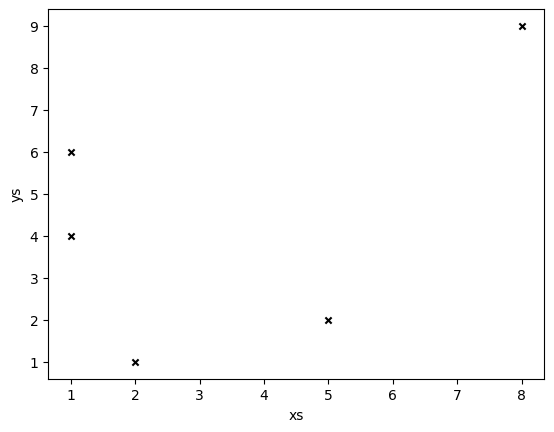

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the DataFrame
df = pd.DataFrame({"xs": [1, 5, 2, 8, 1], "ys": [4, 2, 1, 9, 6]})

# Plot the scatter plot with black X's
df.plot(x='xs', y='ys', kind='scatter', marker='x', color='black')

# Show the plot
plt.show()


**57.** Columns in your DataFrame can also be used to modify colors and sizes.  Bill has been keeping track of his performance at work over time, as well as how good he was feeling that day, and whether he had a cup of coffee in the morning.  Make a plot which incorporates all four features of this DataFrame.

(Hint:  If you're having trouble seeing the plot, try multiplying the Series which you choose to represent size by 10 or more)

*The chart doesn't have to be pretty: this isn't a course in data viz!*

```
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})
```

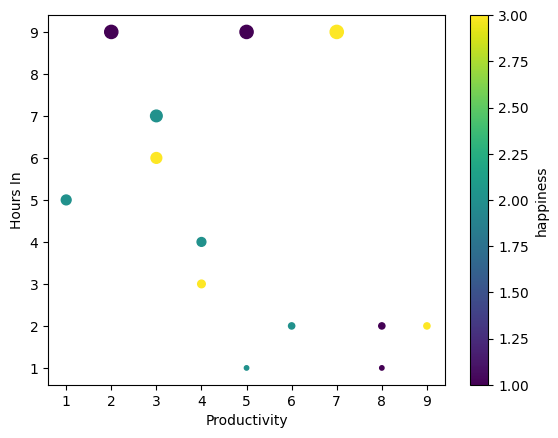

In [78]:
import matplotlib.pyplot as plt

# Create the DataFrame
df = pd.DataFrame({
    "productivity": [5, 2, 3, 1, 4, 5, 6, 7, 8, 3, 4, 8, 9],
    "hours_in": [1, 9, 6, 5, 3, 9, 2, 9, 1, 7, 4, 2, 2],
    "happiness": [2, 1, 3, 2, 3, 1, 2, 3, 1, 2, 2, 1, 3],
    "caffienated": [0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0]
})

# Create the scatter plot
scatter = df.plot.scatter(x='productivity', y='hours_in', c='happiness', s=df['hours_in'] * 10, colormap='viridis')

# Add labels to the axes
scatter.set_xlabel('Productivity')
scatter.set_ylabel('Hours In')

# Show the plot
plt.show()

**58.**  What if we want to plot multiple things?  Pandas allows you to pass in a matplotlib *Axis* object for plots, and plots will also return an Axis object.

Make a bar plot of monthly revenue with a line plot of monthly advertising spending (numbers in millions)

```
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })
```

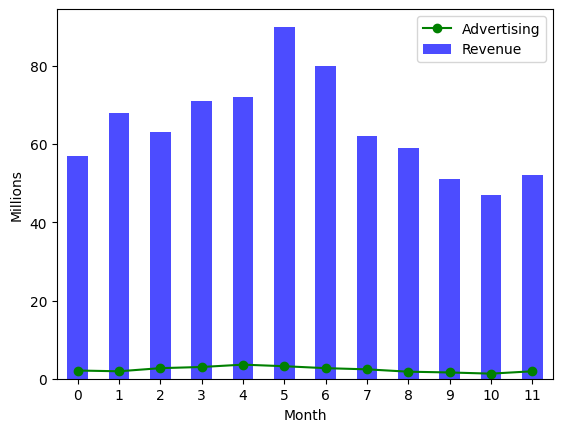

In [79]:
# Create the DataFrame
df = pd.DataFrame({
    "revenue": [57, 68, 63, 71, 72, 90, 80, 62, 59, 51, 47, 52],
    "advertising": [2.1, 1.9, 2.7, 3.0, 3.6, 3.2, 2.7, 2.4, 1.8, 1.6, 1.3, 1.9],
    "month": range(12)
})

# Create a figure and axis objects
fig, ax = plt.subplots()

# Bar plot for monthly revenue
df.plot(x='month', y='revenue', kind='bar', ax=ax, color='blue', alpha=0.7, label='Revenue')

# Line plot for monthly advertising spending
df.plot(x='month', y='advertising', kind='line', ax=ax, color='green', marker='o', label='Advertising')

# Add labels to the axes
ax.set_xlabel('Month')
ax.set_ylabel('Millions')

# Show the legend
ax.legend()

# Show the plot
plt.show()

Now we're finally ready to create a candlestick chart, which is a very common tool used to analyze stock price data.  A candlestick chart shows the opening, closing, highest, and lowest price for a stock during a time window.  The color of the "candle" (the thick part of the bar) is green if the stock closed above its opening price, or red if below.

![Candlestick Example](img/candle.jpg)

This was initially designed to be a pandas plotting challenge, but it just so happens that this type of plot is just not feasible using pandas' methods.  If you are unfamiliar with matplotlib, we have provided a function that will plot the chart for you so long as you can use pandas to get the data into the correct format.

Your first step should be to get the data in the correct format using pandas' time-series grouping function.  We would like each candle to represent an hour's worth of data.  You can write your own aggregation function which returns the open/high/low/close, but pandas has a built-in which also does this.

The below cell contains helper functions.  Call ```day_stock_data()``` to generate a DataFrame containing the prices a hypothetical stock sold for, and the time the sale occurred.  Call ```plot_candlestick(df)``` on your properly aggregated and formatted stock data to print the candlestick chart.

In [80]:
import numpy as np
def float_to_time(x):
    return str(int(x)) + ":" + str(int(x%1 * 60)).zfill(2) + ":" + str(int(x*60 % 1 * 60)).zfill(2)

def day_stock_data():
    #NYSE is open from 9:30 to 4:00
    time = 9.5
    price = 100
    results = [(float_to_time(time), price)]
    while time < 16:
        elapsed = np.random.exponential(.001)
        time += elapsed
        if time > 16:
            break
        price_diff = np.random.uniform(.999, 1.001)
        price *= price_diff
        results.append((float_to_time(time), price))


    df = pd.DataFrame(results, columns = ['time','price'])
    df.time = pd.to_datetime(df.time)
    return df

#Don't read me unless you get stuck!
def plot_candlestick(agg):
    """
    agg is a DataFrame which has a DatetimeIndex and five columns: ["open","high","low","close","color"]
    """
    fig, ax = plt.subplots()
    for time in agg.index:
        ax.plot([time.hour] * 2, agg.loc[time, ["high","low"]].values, color = "black")
        ax.plot([time.hour] * 2, agg.loc[time, ["open","close"]].values, color = agg.loc[time, "color"], linewidth = 10)

    ax.set_xlim((8,16))
    ax.set_ylabel("Price")
    ax.set_xlabel("Hour")
    ax.set_title("OHLC of Stock Value During Trading Day")
    plt.show()

**59.** Generate a day's worth of random stock data, and aggregate / reformat it so that it has hourly summaries of the opening, highest, lowest, and closing prices

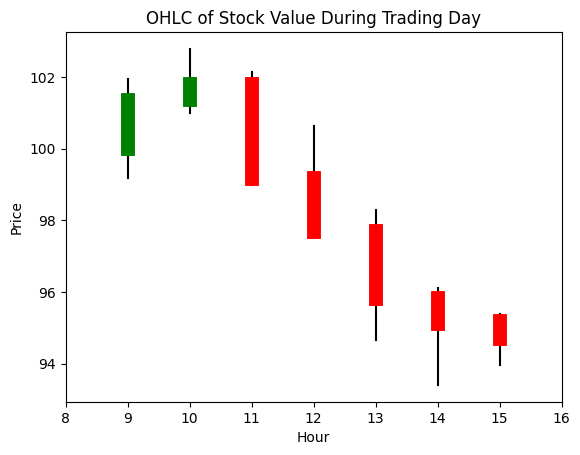

In [81]:
df = day_stock_data()

# Resample the data to hourly summaries
agg = df.set_index('time').resample('H').agg({
    'price': ['first', 'max', 'min', 'last'],
})

# Rename columns
agg.columns = ['open', 'high', 'low', 'close']

# Assign color based on whether the close price is higher or lower than the open price
agg['color'] = np.where(agg['close'] > agg['open'], 'green', 'red')

# Call the plot_candlestick function to visualize the candlestick chart
plot_candlestick(agg)

**60.** Now that you have your properly-formatted data, try to plot it yourself as a candlestick chart.  Use the ```plot_candlestick(df)``` function above, or matplotlib's [```plot``` documentation](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html) if you get stuck.

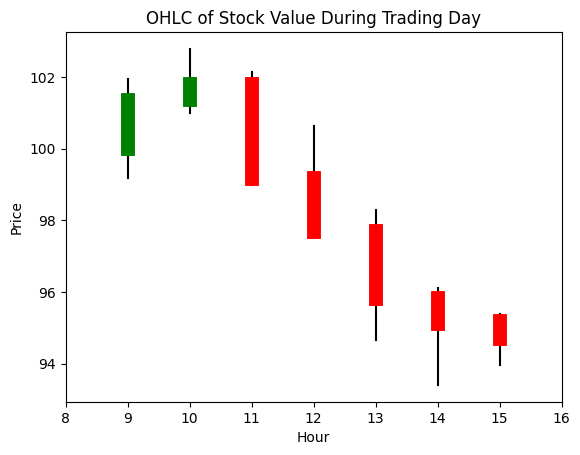

In [82]:
fig, ax = plt.subplots()
for time in agg.index:
    ax.plot([time.hour] * 2, agg.loc[time, ["high", "low"]].values, color="black")
    ax.plot([time.hour] * 2, agg.loc[time, ["open", "close"]].values, color=agg.loc[time, "color"], linewidth=10)

ax.set_xlim((8, 16))
ax.set_ylabel("Price")
ax.set_xlabel("Hour")
ax.set_title("OHLC of Stock Value During Trading Day")
plt.show()

*More exercises to follow soon...*